## Color picker application using computer vision

### Overview
In this article we will be making very interesting application i.e. Color picker which have many use cases but the main use case of this application is that it can be widely used by UI/UX designer who have to pick the color from images and get their color codes and for that we will be using the concepts of computer vision and image processing.  

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

1. cv2: This library is to perform all the computer vision operations basically all the image processing operations that are required.
2. pandas: Pandas has generally lot of scope when it comes to deal with the machine learning problem but in this topic it will be only used for reading the CSV file and extract some information from it.
3. matplotlib: Matplotlib again has lot to do with visualizing the data though here it will be used to plot the image.

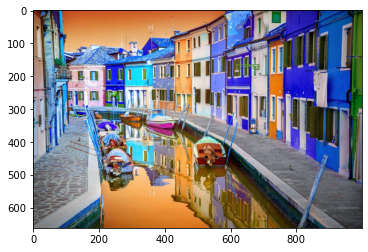

In [2]:
image_location = 'colorpic.jpg'
test = cv2.imread(image_location)
plt.imshow(test)
plt.show()

Code-breakdown
1. Firstly we are just holding the path of the image in the variable here, we are just using the name of the image not the exact path because it's in the same path as our jupyter notebook.
2. Now with the help of cv2's imread() function we will read the image in the numpy array format and store it in the test variable. If we will just print out the test variable then it will only show the image in the array format.
3. Now we will be using the matplotlib's imshow function to see the image that we have read.

### cv2.imshow() VS plt.imshow()

Here arise one question because the one who is familiar with the OpenCV he/she is well aware that to show the image we ideally use `cv2.imshow` function but just to make one thing clear I'm personally a fan of jupyter notebook and here to see the results cv2.imshow function won't work it will just crash that kernel also when you will search about this issue you will find out that using cv2.imshow function is meaningless to use in the client side server (jupyter notebook) hence we use matplotlib (`plt.imshow`) to plot the result in the form of image.

Let's declare some global variables which will be accessible along the whole code

In [3]:
flag_variable = False
red_channel = g_channel = b_channel = x_coordinate = y_coordinate = 0

Code-breakdown:

1. So here, firstly we took one flag variable which will be a indicator that whether we have clicked the image or not so one can see that by default value will be false i.e. picture is not clicked while True value indicates that picture is clicked.
2. Then we have red, green and blue channels (RGB) along with that the X and Y coordinate which for now is set to 0 but as sson as we will move around the image and pick the colors from it then these value will get changed.

Now we will read the color CSV file and give the heading name to every column

In [4]:
heading = ["Color", "Name of color", "Hexadecimal code", "Red channel", "Green channel", "Blue channel"]
color_csv = pd.read_csv('colors.csv', names=heading, header=None)

Code-breakdown:
1. We are setting the name of headings that the color csv file will have.
2. Then we will be reading the color.csv file with the help of read_csv function.
* Note: So, this color csv file have the name , hexadecimal code, RGB values of the color we will be comparing the values from this CSV file only.

Now, we will create the function to get the name of color (get_color_name)

In [5]:
def get_color_name(Red, Green, Blue):
    minimum = 10000
    for i in range(len(color_csv)):
        distance = abs(Red - int(color_csv.loc[i, "Red channel"])) + abs(Green - int(color_csv.loc[i, "Green channel"])) + abs(Blue - int(color_csv.loc[i, "Blue channel"]))
        if distance <= minimum:
            minimum = distance
            color_name = color_csv.loc[i, "Name of color"]
    return color_name

Code-breakdown:

1. So, here first we are setting the threshold value to 10000 i.e. minimum threshold distance between the actual color code and the one which we got while selecting the color from the image.
2. Then we have calculated the distance of the color code from the image.
3. Now we will just see that the distance that we have calculated should be less than or equal to threshold distance.
4. At last we will store the name of color from CSV file and return it.

Now we will create the function to get the coordinates (draw_function)

In [6]:
def draw_function(event, x_coordinate, y_coordinate, flags, parameters):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_position, y_position, flag_variable
        flag_variable = True
        x_position = x_coordinate
        y_position = y_coordinate
        b, g, r = test[y_coordinate, x_coordinate]
        b = int(b)
        g = int(g)
        r = int(r)

Code-breakdown:

So before going breaking down the code I'll like to mention what functionality it possess. Basically, this function will return the value of X and Y coordinate along with that corresponding RGB position when the user will double click on any color.

1. Firsly we will check that whether user has double clicked or not for that we will use EVENT_LBUTTONDBLCLK from cv2.
2. Then we will set the flag_variable to True as now the button is clicked.
3. Then comes the main part of function in which we will store the values of coordinates and their corresponding RGB values in the global variables.
4. At the last we will just convert the values to integer type using int().

In [7]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

Mouse call back: This is the cv2 method which will detect the click from the user (right, left or double click) and call the draw function.

In [8]:
while True:

    cv2.imshow("image", test)
    if flag_variable:

        cv2.rectangle(test, (20, 20), (750, 60), (b, g, r), -1)

        text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

        cv2.putText(test, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
      
        if r + g + b >= 600:
            cv2.putText(test, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        flag_variable = False

    
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

Code-breakdown:

1. In the main logic, firstly we will create the rectangle(filled: -1 is used to fill the rectangle) on which we will have our text.
2. Now we will have the string of our text which will have color code of RGB.
3. Then with the help of putText method we will show the text just above the rectangle that we have previously drawn.
4. We have our validation if the color is light, then we will display the the text string in black color.
5. At last we will have the option to quit the application with the escape key i.e 27.

### Conclusion

1. First we have imported all the libraries.
2. Then we loaded and plot the selected image.
3. Then we have given the headngs to our color CSV file.
4. We have also created get color name function and draw function to see the results on image when user will double click on any  color.
5. Then the app loop to execute all the steps.